In [96]:
from scipy.io import loadmat
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import animation, rc
from IPython.display import HTML, Image

In [97]:
# Import signal
ID = '02'
h = '50'
data = loadmat('../data/ID' + ID + '_' + h + 'h.mat')
info = loadmat('../data/ID02_info.mat')
data = data['EEG']
fs = float(info['fs'])

In [81]:
# Parameters
nperseg = int(1*60*fs)
noverlap = 0

In [88]:
f, t, Sxx = signal.spectrogram(data[0, :], fs, nperseg=nperseg, noverlap=noverlap)
Sxx.shape

(15361, 60)

In [66]:
corrmats = np.zeros((data.shape[0], data.shape[0], int((data.shape[1]-nperseg)/(nperseg-noverlap))))
for i in range(corrmats.shape[2]):
    corrmats[:,:,i] = np.corrcoef(data[:, int(i*(nperseg-noverlap)):int(i*(nperseg-noverlap)+nperseg)])
corr_val = np.mean(np.mean(np.abs(corrmats), axis=0), axis=0)

In [94]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

def init():
    level.set_array([])
    dot.set_data([],[])
    line.set_data([], [])
    return level


def update(frame):
    level.set_array(corrmats[:, :, frame].ravel())
    dot.set_data(x_axis[frame],corr_val[frame])
    line.set_data([frame, frame], [0, 30])
    return level

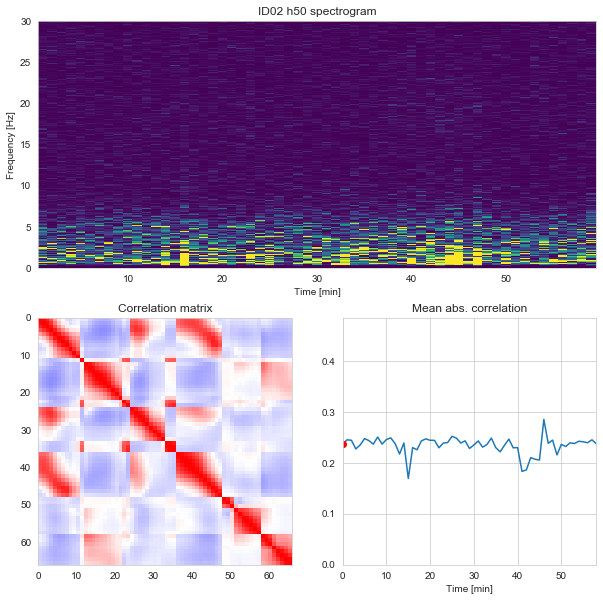

In [95]:
#y, x = np.meshgrid(np.arange(0, corrmats.shape[0], 1), np.arange(0, corrmats.shape[0], 1))
corr = np.ones((corrmats.shape[0], corrmats.shape[0]))
sns.set_style('whitegrid')

fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(gs[:1, :])
ax0.pcolormesh(t/60, f, Sxx, vmin=0, vmax=20, cmap='viridis')
ax0.set_title('ID' + ID + ' h' + h + ' spectrogram')
ax0.set_ylabel('Frequency [Hz]')
ax0.set_ylim(0, 30)
ax0.set_xlabel('Time [min]')
line, = ax0.plot([], [], color='red')

ax1 = fig.add_subplot(gs[1:, :1])
level = ax1.pcolormesh(corr, cmap='bwr', vmin=-1, vmax=1)
ax1.invert_yaxis()
ax1.set_title('Correlation matrix')

ax2 = fig.add_subplot(gs[1:, 1:])
ax2.plot(corr_val)
ax2.set_title('Mean abs. correlation')
x_axis = np.arange(corrmats.shape[2])
ax2.set_xlim(0, x_axis[-1])
ax2.set_ylim(0, np.max(corr_val) + 0.2)
ax2.set_xlabel('Time [min]')
dot, = ax2.plot([], [], 'o', color='red')


ani = animation.FuncAnimation(fig, update, frames=corrmats.shape[2], interval=20)

In [73]:
ani.save('../doc/figures/test.gif', writer='imagemagick', fps=6)

In [43]:
66*66

4356

In [47]:
corrmats.shape

(66, 66, 59)

In [98]:
18432000/fs/60/60

10.0